# Median Home Prices

<div class="alert alert-block alert-warning">

Use Python(Jupyter Notebook) to analyze the following dataset - 'Median Home Prices' - To do the following:

1 - Descriptive Statistical Analysis: mean, median, and range of home prices in various metropolitan areas and regions for the different periods (2004 - 2011) in the US. Use tables, and graphs / boxplots to show your results for each key region (North East, South East, Central, and West). Do not print the actual data. Points will be deducted for printing raw data. Brief interpretation of your results.

2 - Trend analysis over the period provided for each key region (North East, South East, Central, and West). Use graphs / plots as well as a combined plot for all regions for comparison. Brief interpretation of your results.

3 - ANOVA testing among regions. Do the mean median home prices vary among regions? Brief interpretation of your results.

4 - Concluding remarks. A brief paragraph summarizing your observations.

Your code and plots should be embedded into your report, in a similar format as the other projects and the previous midterm. Also, provide brief comments at the end of each section and concluding remarks at the end, interpreting the result of your analysis. Use this opportunity to practice professional reporting for your data analysis as well as practicing for your final project.

Pls submit your answer in an HTML document. No cut & paste of screen shots will be accepted.

Note: Need to group the data for regions to do regional comparative analysis


   <h2> Aim project <h2>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import math

# Explore Datasets

In [2]:
# read csv
df=pd.read_csv(r'Median Home Prices.csv')
df.head()

,Unnamed: 0,Metropolitan Area,State(s),Region,2004,2005,2006,2007,2008,2009,2010,2011
0,1,"Abilene, TX",TX,Southeast,NaN,NaN,NaN,NaN,NaN,NaN,112.8,119.2
1,2,"Akron, OH",OH,Central,116.9,120.5,114.6,119.3,100.5,93.2,108.9,90.9
2,3,"Albany-Schenectady-Troy, NY",NY,Northeast,161.3,183.5,195.4,198.9,197.9,189.1,195.7,193.8
3,4,"Albuquerque, NM",NM,West,145.4,169.2,184.2,198.5,192.6,180.6,178.7,167.9
4,5,"Allentown-Bethlehem-Easton, PA-NJ",PA-NJ,Northeast,207.3,243.4,248.1,260.8,243.6,223.4,224.0,185.4


In [3]:
# to see last 5 rows
df.tail()

,Unnamed: 0,Metropolitan Area,State(s),Region,2004,2005,2006,2007,2008,2009,2010,2011
158,159,"Winston-Salem, NC",NC,Southeast,NaN,NaN,NaN,NaN,NaN,NaN,134.7,125.9
159,160,"Worcester, MA",MA,Northeast,275.9,290.7,281.7,274.6,237.1,217.7,223.3,209.6
160,161,"Yakima, WA",WA,West,129.9,133.9,136.5,156.5,153.3,155.2,155.7,150.4
161,162,"York-Hanover, PA",PA,Northeast,NaN,NaN,NaN,NaN,NaN,NaN,158.6,151.6
162,163,"Youngstown-Warren-Boardman, OH-PA",OH-PA,Central,86.0,85.6,81.5,78.9,71.7,66.5,67.2,NaN


In [4]:
# to see datatypes
df.dtypes

Unnamed: 0             int64
Metropolitan Area     object
State(s)              object
Region                object
2004                 float64
2005                 float64
2006                 float64
2007                 float64
2008                 float64
2009                 float64
2010                 float64
2011                 float64
dtype: object

In [5]:
df['Metropolitan Area'] = df['Metropolitan Area'].astype(str)

In [6]:
# to see some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 12 columns):
Unnamed: 0           163 non-null int64
Metropolitan Area    163 non-null object
State(s)             163 non-null object
Region               163 non-null object
2004                 149 non-null float64
2005                 149 non-null float64
2006                 149 non-null float64
2007                 149 non-null float64
2008                 154 non-null float64
2009                 153 non-null float64
2010                 158 non-null float64
2011                 154 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 15.4+ KB


In [7]:
df.shape

(163, 12)

In [8]:
# Statistical Description
df.describe()

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011
count,163.000000,149.000000,149.000000,149.000000,149.000000,154.000000,153.000000,158.000000,154.000000
mean,82.000000,183.796644,206.902685,215.265101,217.318792,196.155195,178.443791,179.451266,171.729870
std,47.198164,111.878817,128.410024,133.216164,135.844739,106.485832,90.203337,95.621464,92.641249
min,1.000000,72.700000,77.100000,81.500000,78.900000,71.700000,66.500000,67.200000,53.800000
25%,41.500000,116.900000,129.800000,133.800000,134.500000,130.050000,124.600000,124.175000,119.725000
50%,82.000000,143.300000,156.400000,165.100000,164.600000,155.700000,147.000000,146.000000,142.300000
75%,122.500000,200.800000,244.900000,249.500000,252.100000,226.125000,203.500000,199.450000,184.925000
max,163.000000,698.500000,744.500000,775.000000,836.800000,668.000000,596.200000,607.600000,597.000000


In [9]:
# Statistical Description of objects

df.describe(include='object')

,Metropolitan Area,State(s),Region
count,163,163,163
unique,163,68,4
top,"Tulsa, OK",FL,Southeast
freq,1,12,53


In [10]:
# convert all years columns to one date column 
df.columns[4:]

Index(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011'], dtype='object')

In [11]:
dates = df.columns[4:]

df_long = df.melt(
    id_vars=['Unnamed: 0', 'Metropolitan Area', 'State(s)', 'Region'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='price'
)


In [12]:
df_long.head()

,Unnamed: 0,Metropolitan Area,State(s),Region,Date,price
0,1,"Abilene, TX",TX,Southeast,2004,NaN
1,2,"Akron, OH",OH,Central,2004,116.9
2,3,"Albany-Schenectady-Troy, NY",NY,Northeast,2004,161.3
3,4,"Albuquerque, NM",NM,West,2004,145.4
4,5,"Allentown-Bethlehem-Easton, PA-NJ",PA-NJ,Northeast,2004,207.3


In [13]:
df_long.tail()

,Unnamed: 0,Metropolitan Area,State(s),Region,Date,price
1299,159,"Winston-Salem, NC",NC,Southeast,2011,125.9
1300,160,"Worcester, MA",MA,Northeast,2011,209.6
1301,161,"Yakima, WA",WA,West,2011,150.4
1302,162,"York-Hanover, PA",PA,Northeast,2011,151.6
1303,163,"Youngstown-Warren-Boardman, OH-PA",OH-PA,Central,2011,NaN


In [14]:
df_long.describe()

,Unnamed: 0,price
count,1304.000000,1215.000000
mean,82.000000,193.398107
std,47.071214,113.745144
min,1.000000,53.800000
25%,41.000000,125.300000
50%,82.000000,152.000000
75%,123.000000,217.850000
max,163.000000,836.800000


# Data Cleansing
there are different techniques to remove Nan/Null data two of them we are using below

In [15]:
df_long[df_long.Region != 'Nan' ] #Region
df_long[df_long.Date != 'Nan' ] #Date

df_long["price"].replace(np.nan, df_long["price"].mean(), inplace=True)


In [16]:
df_long

,Unnamed: 0,Metropolitan Area,State(s),Region,Date,price
0,1,"Abilene, TX",TX,Southeast,2004,193.398107
1,2,"Akron, OH",OH,Central,2004,116.900000
2,3,"Albany-Schenectady-Troy, NY",NY,Northeast,2004,161.300000
3,4,"Albuquerque, NM",NM,West,2004,145.400000
4,5,"Allentown-Bethlehem-Easton, PA-NJ",PA-NJ,Northeast,2004,207.300000
...,...,...,...,...,...,...
1299,159,"Winston-Salem, NC",NC,Southeast,2011,125.900000
1300,160,"Worcester, MA",MA,Northeast,2011,209.600000
1301,161,"Yakima, WA",WA,West,2011,150.400000
1302,162,"York-Hanover, PA",PA,Northeast,2011,151.600000


In [18]:
# Now there is clean data
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 6 columns):
Unnamed: 0           1304 non-null int64
Metropolitan Area    1304 non-null object
State(s)             1304 non-null object
Region               1304 non-null object
Date                 1304 non-null object
price                1304 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 61.2+ KB


# Q1 Descriptive Statistical
<b> Mean/Avg with period of timeon the basis of  Regionwise <b>

In [19]:
#method 1 using groupby to see all at once
df_long.groupby([df_long.Date,df_long.Region])[['price']].mean()
    

price
Date Region               
2004 Central    131.973249
     Northeast  223.752358
     Southeast  150.044997
     West       290.079924
2005 Central    138.535471
     Northeast  250.709858
     Southeast  169.622356
     West       331.343924
2006 Central    139.022138
     Northeast  257.204858
     Southeast  177.916695
     West       352.331924
2007 Central    139.424360
     Northeast  259.497358
     Southeast  177.573299
     West       360.907924
2008 Central    131.582180
     Northeast  246.159905
     Southeast  164.371484
     West       298.768000
2009 Central    126.664402
     Northeast  224.674905
     Southeast  151.452580
     West       260.880000
2010 Central    128.628847
     Northeast  227.964953
     Southeast  146.041402
     West       266.928000
2011 Central    126.731027
     Northeast  218.787453
     Southeast  139.939480
     West       252.631849

In [21]:
# using sql queryy for better visualization
query_1 = '''SELECT avg("price") as mean ,"Region", "Date" FROM df_long  where "Region" = "Southeast" group by "Date";'''
res_1 = pysqldf(query_1)
res_1

,mean,Region,Date
0,150.044997,Southeast,2004
1,169.622356,Southeast,2005
2,177.916695,Southeast,2006
3,177.573299,Southeast,2007
4,164.371484,Southeast,2008
5,151.452580,Southeast,2009
6,146.041402,Southeast,2010
7,139.939480,Southeast,2011


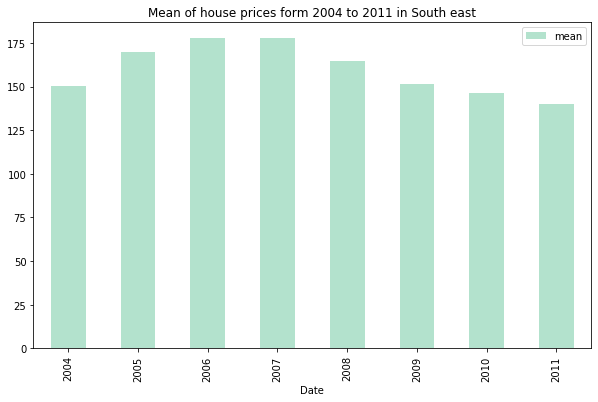

In [28]:
# bar graph
import matplotlib.pyplot as plt

res_1.plot.bar(x='Date', y='mean' , colormap='Pastel2', title='Mean of house prices form 2004 to 2011 in South east')
plt.gcf().set_size_inches(10, 6)
plt.show()

In [24]:
# sql queryy 2
query_2 = '''SELECT avg("price") as mean ,"Region", "Date" FROM df_long  where "Region" = "Central" group by "Date";'''
res_2 = pysqldf(query_2)
res_2

,mean,Region,Date
0,131.973249,Central,2004
1,138.535471,Central,2005
2,139.022138,Central,2006
3,139.424360,Central,2007
4,131.582180,Central,2008
5,126.664402,Central,2009
6,128.628847,Central,2010
7,126.731027,Central,2011


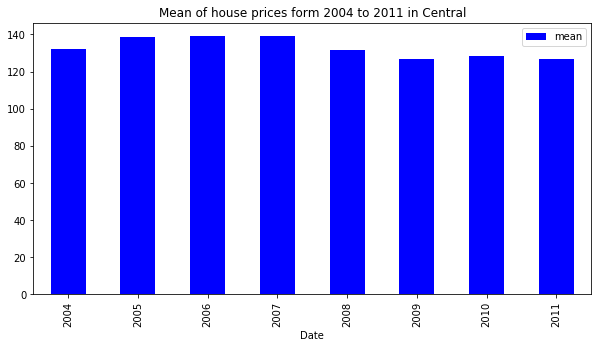

In [27]:
# bar graph
import matplotlib.pyplot as plt

res_2.plot.bar(x='Date', y='mean' , colormap='winter', title='Mean of house prices form 2004 to 2011 in Central')
plt.gcf().set_size_inches(10, 5)
plt.show()

In [29]:
# sql queryy
query_3 = '''SELECT avg("price") as mean ,"Region", "Date" FROM df_long  where "Region" = "Northeast" group by "Date";'''
res_3 = pysqldf(query_3)
res_3

,mean,Region,Date
0,223.752358,Northeast,2004
1,250.709858,Northeast,2005
2,257.204858,Northeast,2006
3,259.497358,Northeast,2007
4,246.159905,Northeast,2008
5,224.674905,Northeast,2009
6,227.964953,Northeast,2010
7,218.787453,Northeast,2011


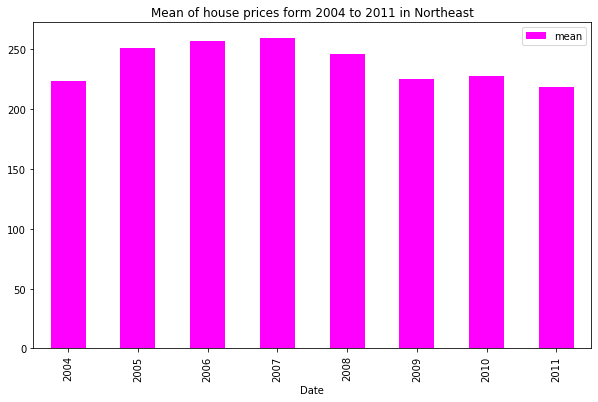

In [31]:
# bar graph
import matplotlib.pyplot as plt

res_3.plot.bar(x='Date', y='mean' , colormap='spring', title='Mean of house prices form 2004 to 2011 in Northeast')
plt.gcf().set_size_inches(10, 6)
plt.show()

In [32]:
# sql queryy
query_4 = '''SELECT avg("price") as mean ,"Region", "Date" FROM df_long  where "Region" = "West" group by "Date";'''
res_4 = pysqldf(query_4)
res_4

,mean,Region,Date
0,290.079924,West,2004
1,331.343924,West,2005
2,352.331924,West,2006
3,360.907924,West,2007
4,298.768000,West,2008
5,260.880000,West,2009
6,266.928000,West,2010
7,252.631849,West,2011


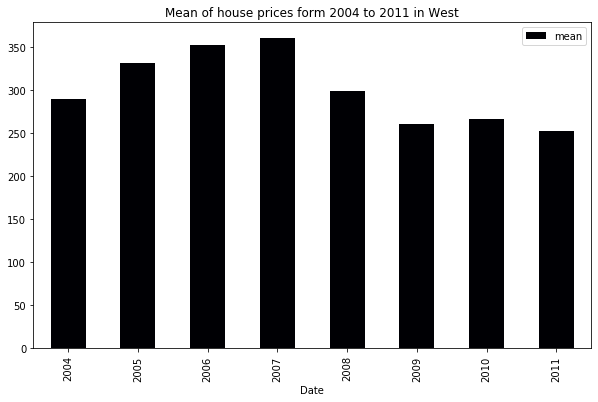

In [34]:
# bar graph
import matplotlib.pyplot as plt

res_4.plot.bar(x='Date', y='mean' , colormap='magma', title='Mean of house prices form 2004 to 2011 in West')
plt.gcf().set_size_inches(10, 6)
plt.show()

<b>  mean with respect to Metrapolian area <b>

In [36]:
p=df_long.groupby([df_long.Date,df_long['Metropolitan Area']])[['price']].mean()
p

price
Date Metropolitan Area                             
2004  Champaign-Urbana, IL               127.200000
     Abilene, TX                         193.398107
     Akron, OH                           116.900000
     Albany-Schenectady-Troy, NY         161.300000
     Albuquerque, NM                     145.400000
...                                             ...
2011 Winston-Salem, NC                   125.900000
     Worcester, MA                       209.600000
     Yakima, WA                          150.400000
     York-Hanover, PA                    151.600000
     Youngstown-Warren-Boardman, OH-PA   193.398107

[1304 rows x 1 columns]

# Q1 Descriptive Statistical
<b> Median with period of timeon the basis of Regionwise <b>

In [38]:
df_med=df_long[['Region','Date','price']]
df_med.head(2)

,Region,Date,price
0,Southeast,2004,193.398107
1,Central,2004,116.900000


In [39]:
# method 1 groupby
df_grp=df_med.groupby(['Region','Date'], as_index=False ).median()
df_grp

,Region,Date,price
0,Central,2004,124.20
1,Central,2005,131.80
2,Central,2006,134.40
3,Central,2007,134.50
4,Central,2008,128.10
5,Central,2009,125.80
6,Central,2010,124.00
7,Central,2011,122.30
8,Northeast,2004,202.60
9,Northeast,2005,245.00


In [42]:
# method 2 groupby
l=df_long.groupby([df_long.Date,df_long.Region])[['price']].median()
l    

price
Date Region           
2004 Central    124.20
     Northeast  202.60
     Southeast  139.80
     West       206.50
2005 Central    131.80
     Northeast  245.00
     Southeast  159.20
     West       247.10
2006 Central    134.40
     Northeast  245.95
     Southeast  169.50
     West       268.20
2007 Central    134.50
     Northeast  250.55
     Southeast  165.60
     West       257.40
2008 Central    128.10
     Northeast  239.60
     Southeast  152.80
     West       220.50
2009 Central    125.80
     Northeast  213.85
     Southeast  141.40
     West       189.80
2010 Central    124.00
     Northeast  216.45
     Southeast  140.90
     West       195.50
2011 Central    122.30
     Northeast  205.40
     Southeast  134.60
     West       187.20

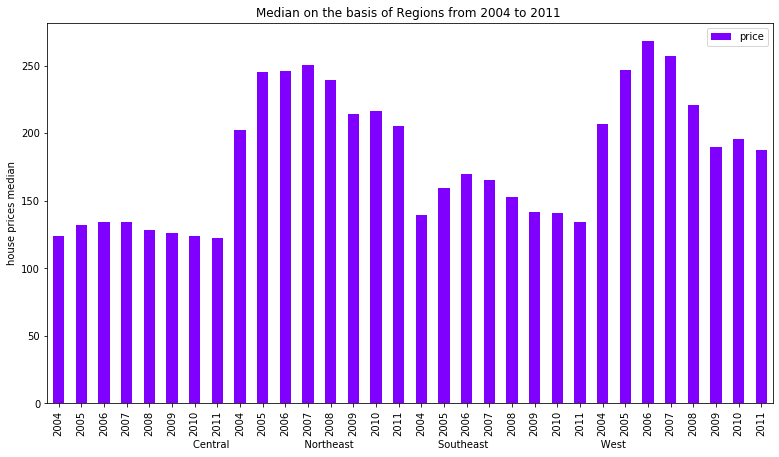

In [51]:
# bar graph
import matplotlib.pyplot as plt

df_grp.plot.bar(x='Date', y='price' , colormap='rainbow', title='Median on the basis of Regions from 2004 to 2011 ')
plt.ylabel('house prices median')
plt.xlabel('Central                        Northeast                           Southeast                                    West')
plt.gcf().set_size_inches(13, 7)
plt.show()

In [56]:
 df_long.head(2)

,Unnamed: 0,Metropolitan Area,State(s),Region,Date,price
0,1,"Abilene, TX",TX,Southeast,2004,193.398107
1,2,"Akron, OH",OH,Central,2004,116.900000


# Q1 Descriptive Statistical
<b> Range with period of time on the basis of Regionwise <b>

In [59]:
l=df_long.groupby([df_long.Date,df_long.Region])[['price']].agg([('Min' , 'min'), ('Max', 'max')]).add_prefix('price')
l

priceprice         
                 priceMin priceMax
Date Region                       
2004 Central         75.5    240.1
     Northeast       72.7    441.3
     Southeast       93.5    286.4
     West           128.5    698.5
2005 Central         82.1    264.2
     Northeast       77.1    495.2
     Southeast       98.5    363.9
     West           133.9    744.5
2006 Central         81.5    273.5
     Northeast       86.8    539.4
     Southeast      112.7    371.2
     West           136.5    775.0
2007 Central         78.9    276.6
     Northeast       81.6    540.3
     Southeast      118.4    365.5
     West           156.5    836.8
2008 Central         71.7    245.6
     Northeast       87.7    494.3
     Southeast      117.3    285.1
     West           153.3    668.0
2009 Central         66.5    212.3
     Northeast       87.3    437.2
     Southeast       87.6    215.4
     West           137.0    596.2
2010 Central         67.2    217.7
     Northeast      100.3    450.0
     Southeast       87.8    217.6
     West           136.2    607.6
2011 Central         53.8    213.2
     Northeast       88.8    442.6
     Southeast       80.9    197.0
     West           115.4    597.0

In [86]:
l=df_long.groupby([df_long.Date,df_long.Region])[['price']].mean()
l    

price
Date Region               
2004 Central    129.116279
     Northeast  226.213514
     Southeast  142.337778
     West       294.108333
2005 Central    135.983721
     Northeast  255.356757
     Southeast  165.395556
     West       337.091667
2006 Central    136.493023
     Northeast  262.378378
     Southeast  175.164444
     West       358.954167
2007 Central    136.913953
     Northeast  264.856757
     Southeast  174.760000
     West       367.887500
2008 Central    130.177273
     Northeast  248.936842
     Southeast  160.665957
     West       298.768000
2009 Central    125.147727
     Northeast  226.321053
     Southeast  145.069565
     West       260.880000
2010 Central    127.156818
     Northeast  228.851282
     Southeast  143.200000
     West       266.928000
2011 Central    123.630233
     Northeast  219.438462
     Southeast  135.575510
     West       257.782609

<b> we have completed question1 and for solving this first we explore datathen clean it and after it we found range, median and mean/ avg with the perspective of region and areas with period of time.
 from 2004 to 2011 <b>

# Q2 Trend Analysis
<b>  from 2004 to 2011 on the basis of regions <b>

<b> 2004 <b>

In [65]:
# sql queryy
query1 = '''SELECT sum("price") as total_count_2004 ,"Date","Region" FROM df_long where "Date"="2004" group by "Region";'''
res1 = pysqldf(query1)
res1

,total_count_2004,Date,Region
0,5938.796214,2004,Central
1,8950.094321,2004,Northeast
2,7952.384856,2004,Southeast
3,7251.998107,2004,West


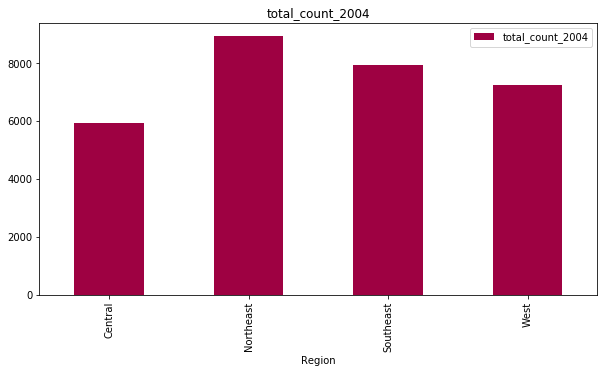

In [66]:

res1.plot.bar(x='Region', y='total_count_2004' , colormap='Spectral', title='total_count_2004')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2005 <b>

In [68]:
# sql queryy
query2 = '''SELECT sum("price") as total_count_2005 ,"Date","Region" FROM df_long where "Date"="2005" group by "Region";'''
res2 = pysqldf(query2)
res2

,total_count_2005,Date,Region
0,6234.096214,2005,Central
1,10028.394321,2005,Northeast
2,8989.984856,2005,Southeast
3,8283.598107,2005,West


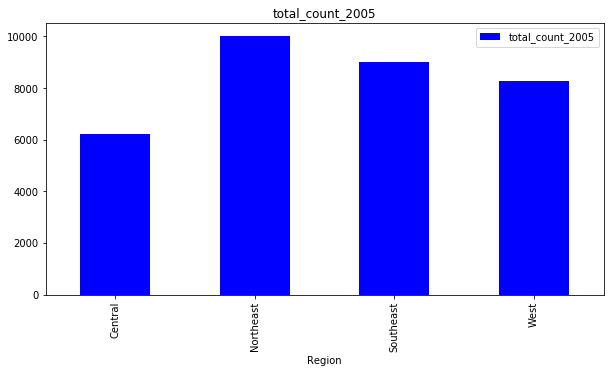

In [69]:

res2.plot.bar(x='Region', y='total_count_2005' , colormap='winter', title='total_count_2005')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2006 <b> 

In [70]:
# sql queryy
query3 = '''SELECT sum("price") as total_count_2006 ,"Date","Region" FROM df_long where "Date"="2006" group by "Region";'''
res3 = pysqldf(query3)
res3

,total_count_2006,Date,Region
0,6255.996214,2006,Central
1,10288.194321,2006,Northeast
2,9429.584856,2006,Southeast
3,8808.298107,2006,West


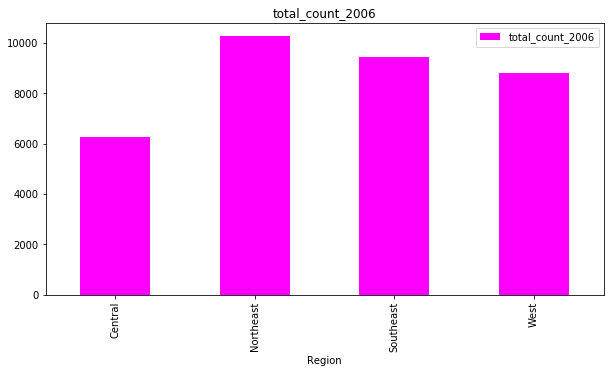

In [71]:

res3.plot.bar(x='Region', y='total_count_2006' , colormap='spring', title='total_count_2006')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2007 <b>

In [72]:
# sql queryy
query4 = '''SELECT sum("price") as total_count_2007 ,"Date","Region" FROM df_long where "Date"="2007" group by "Region";'''
res4 = pysqldf(query4)
res4

,total_count_2007,Date,Region
0,6274.096214,2007,Central
1,10379.894321,2007,Northeast
2,9411.384856,2007,Southeast
3,9022.698107,2007,West


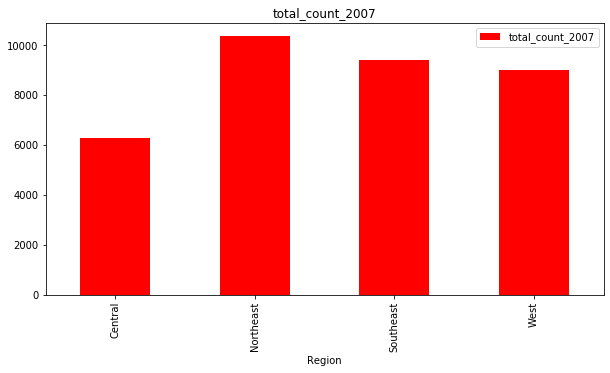

In [73]:

res4.plot.bar(x='Region', y='total_count_2007' , colormap='prism', title='total_count_2007')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2008 <b>

In [74]:
# sql queryy
query5 = '''SELECT sum("price") as total_count_2008 ,"Date","Region" FROM df_long where "Date"="2008" group by "Region";'''
res5 = pysqldf(query5)
res5

,total_count_2008,Date,Region
0,5921.198107,2008,Central
1,9846.396214,2008,Northeast
2,8711.688642,2008,Southeast
3,7469.200000,2008,West


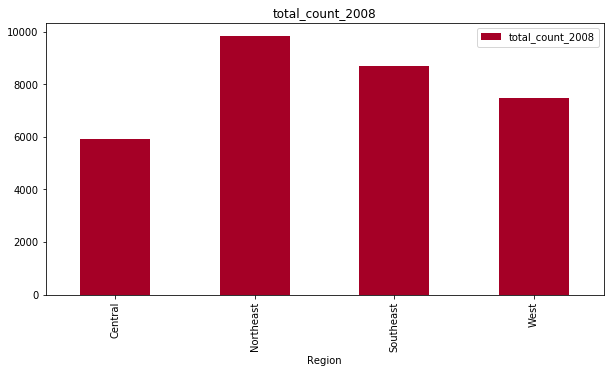

In [75]:

res5.plot.bar(x='Region', y='total_count_2008' , colormap='RdYlBu', title='total_count_2008')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2009 <b>

In [76]:
# sql queryy
query6 = '''SELECT sum("price") as total_count_2009 ,"Date","Region" FROM df_long where "Date"="2009" group by "Region";'''
res6 = pysqldf(query6)
res6

,total_count_2009,Date,Region
0,5699.898107,2009,Central
1,8986.996214,2009,Northeast
2,8026.986749,2009,Southeast
3,6522.000000,2009,West


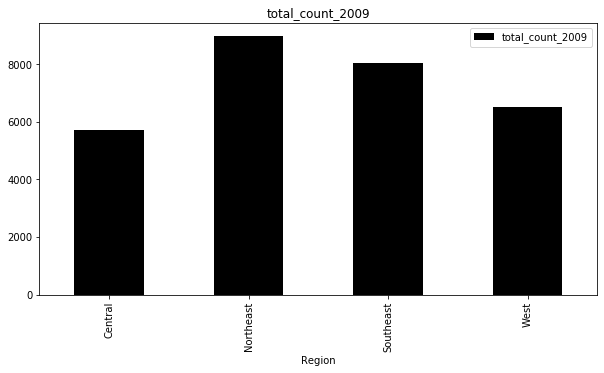

In [77]:

res6.plot.bar(x='Region', y='total_count_2009' , colormap='gist_heat', title='total_count_2009')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2010 <b>

In [78]:
# sql queryy
query7 = '''SELECT sum("price") as total_count_2010 ,"Date","Region" FROM df_long where "Date"="2010" group by "Region";'''
res7 = pysqldf(query7)
res7

,total_count_2010,Date,Region
0,5788.298107,2010,Central
1,9118.598107,2010,Northeast
2,7740.194321,2010,Southeast
3,6673.200000,2010,West


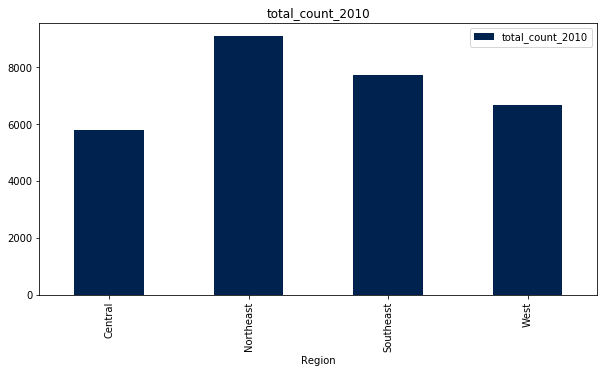

In [79]:

res7.plot.bar(x='Region', y='total_count_2010' , colormap='cividis', title='total_count_2010')
plt.gcf().set_size_inches(10, 5)
plt.show()

<b> 2011 <b>

In [80]:
# sql queryy
query8 = '''SELECT sum("price") as total_count_2011 ,"Date","Region" FROM df_long where "Date"="2011" group by "Region";'''
res8 = pysqldf(query8)
res8

,total_count_2011,Date,Region
0,5702.896214,2011,Central
1,8751.498107,2011,Northeast
2,7416.792428,2011,Southeast
3,6315.796214,2011,West


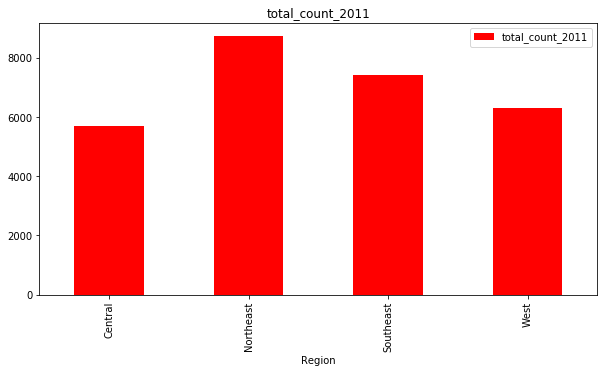

In [81]:

res8.plot.bar(x='Region', y='total_count_2011' , colormap='prism', title='total_count_2011')
plt.gcf().set_size_inches(10, 5)
plt.show()

In [ ]:
# Combine graph 

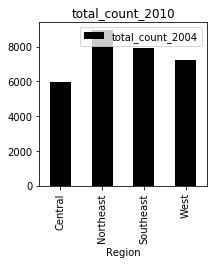

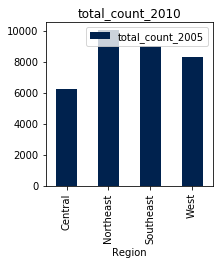

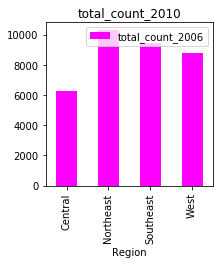

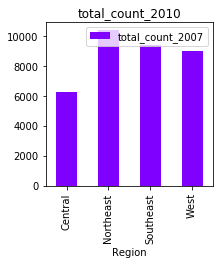

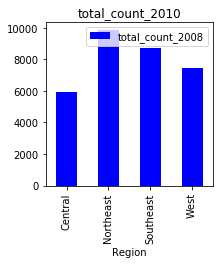

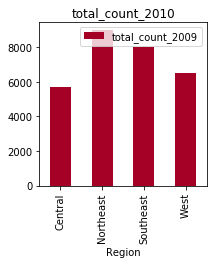

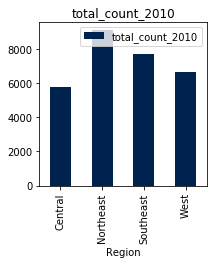

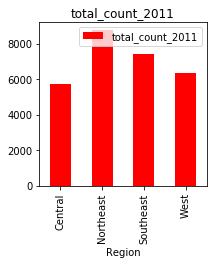

In [85]:
res1.plot.bar(x='Region', y='total_count_2004' , colormap='gist_heat', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res2.plot.bar(x='Region', y='total_count_2005' , colormap='cividis', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res3.plot.bar(x='Region', y='total_count_2006' , colormap='spring', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res4.plot.bar(x='Region', y='total_count_2007' , colormap='rainbow', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res5.plot.bar(x='Region', y='total_count_2008' , colormap='winter', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res6.plot.bar(x='Region', y='total_count_2009' , colormap='RdYlBu', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res7.plot.bar(x='Region', y='total_count_2010' , colormap='cividis', title='total_count_2010')
plt.gcf().set_size_inches(3, 3)
plt.show()

res8.plot.bar(x='Region', y='total_count_2011' , colormap='prism', title='total_count_2011')
plt.gcf().set_size_inches(3, 3)
plt.show()

<b> In trend analysis, we count sum of price per year on the basis of every region by using graphs and sql queries, ence we find that northwest is a place 
where in every year total price is more than of all three regions, and total price in central region is less than all three regions
in all years from 2004 to 2011 <b>

In [87]:
df_long.head(2)

,Unnamed: 0,Metropolitan Area,State(s),Region,Date,price
0,1,"Abilene, TX",TX,Southeast,2004,193.398107
1,2,"Akron, OH",OH,Central,2004,116.900000


# Q3 Anova testing
<b>  from 2004 to 2011 on the basis of regions <b>

ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [88]:
# count
df_gr=df_med.groupby(['Region','Date'], as_index=False ).count()
df_gr

,Region,Date,price
0,Central,2004,45
1,Central,2005,45
2,Central,2006,45
3,Central,2007,45
4,Central,2008,45
5,Central,2009,45
6,Central,2010,45
7,Central,2011,45
8,Northeast,2004,40
9,Northeast,2005,40


In [188]:
# group data
grouped_test2=df_long[['Region', 'price']].groupby(['Region'])
grouped_test2.head(1)

,Region,price
0,Southeast,193.398107
1,Central,116.900000
2,Northeast,161.300000
3,West,145.400000


In [189]:
print(grouped_test2.get_group('Southeast')['price'])
print(grouped_test2.get_group('West')['price'])

0       193.398107
5        97.100000
8       156.900000
10      154.700000
13      127.700000
           ...    
1282    117.000000
1288    143.000000
1289    127.800000
1295    182.900000
1299    125.900000
Name: price, Length: 424, dtype: float64
3       145.400000
6       627.300000
19      193.398107
21      325.300000
36      187.600000
           ...    
1276    570.000000
1278    285.000000
1283    162.300000
1293    134.500000
1301    150.400000
Name: price, Length: 200, dtype: float64


<b> Anova testing b/w west and central regions <b>

In [191]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('West')['price'], grouped_test2.get_group('Central')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 313.23048134138736 , P = 5.794413494722057e-56


<b> Anova testing b/w Northeast and central regions <b>

In [192]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Northeast')['price'], grouped_test2.get_group('Central')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 314.63602710200325 , P = 4.0675711014959634e-58


again there is good relation because f value is high and p is small

<b> Anova testing b/w Southeast and Central regions <b>

In [193]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Southeast')['price'], grouped_test2.get_group('Central')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 89.8597295375262 , P = 2.9727416373323807e-20


<b> Anova testing b/w Southeast and West regions <b>

In [194]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Southeast')['price'], grouped_test2.get_group('West')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 250.44377325385668 , P = 1.1847744767506292e-47


<b> Anova testing b/w Northeast and West regions <b>

In [195]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Northeast')['price'], grouped_test2.get_group('West')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 26.246059185887418 , P = 4.2481599700445666e-07


In [ ]:
Not a good relation because very less value of f as compare to above results

<b> Anova testing b/w Northeast and Southeast regions <b>

In [196]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Northeast')['price'], grouped_test2.get_group('Southeast')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 193.3039922974096 , P = 3.1849284908979565e-39


# Mean/ Median varying 

By seeing anova testing and above results of mean, median and range, one can say that if we group different regions 
they are varying with each other, mostly central region is varying with other regions because we have seen good high f score.

# Q4 -Conclusion/ Summary of Project/ Remarks

I tried my best to complete each and every thing as was mentioned to do, and find statical analysis, trend analysis and anova testing in tables as well as with graphs to show comparison of house prices in different regions and i found mostly the high prices are in northeast and less prices at central region.
one of the issue was less data, as if we have more data , we can do more better analysis and i think if we have that like project, we must have to use atleast couple of ML algorithms for best practice to predict our results as well.